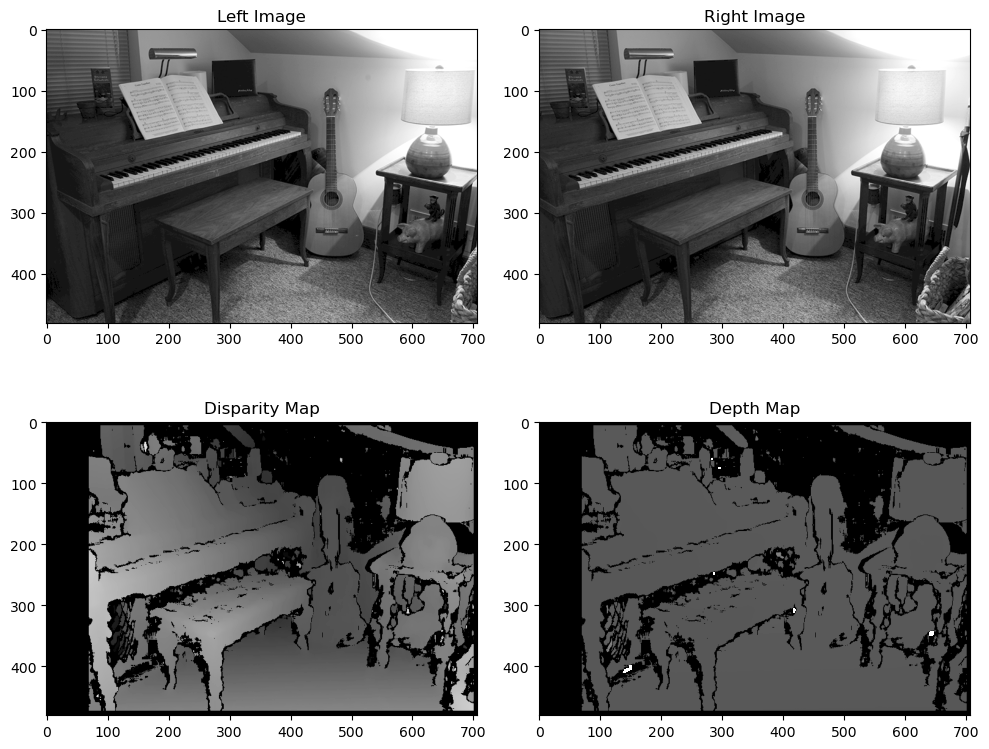

In [50]:
import cv2 as cv 
from matplotlib import pyplot as plt 
import sys

# Suppress libpng warnings
sys.stderr = open('/dev/null', 'w')

# Read left and right images 
imgL = cv.imread('/Users/nandinidhiran/Downloads/im0.png', cv.IMREAD_GRAYSCALE)
imgR = cv.imread('/Users/nandinidhiran/Downloads/im1.png', cv.IMREAD_GRAYSCALE)

# Re-enable stderr
sys.stderr = sys.__stderr__

# Create StereoBM object 
stereo = cv.StereoBM_create(numDisparities=64, blockSize=15) 

# Compute disparity 
disparity = stereo.compute(imgL, imgR) 

# Convert disparity map to depth map (assuming baseline and focal length)
baseline = 1  
focal_length = 1  
depth_map = baseline * focal_length / disparity

# Plot subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot left image
axs[0, 0].imshow(imgL, cmap='gray')
axs[0, 0].set_title('Left Image')

# Plot right image
axs[0, 1].imshow(imgR, cmap='gray')
axs[0, 1].set_title('Right Image')

# Plot disparity map
axs[1, 0].imshow(disparity, cmap='gray')
axs[1, 0].set_title('Disparity Map')

# Plot depth map
im = axs[1, 1].imshow(depth_map, cmap='gray')
axs[1, 1].set_title('Depth Map')
#plt.colorbar(im, ax=axs[1, 1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()